In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Nigeria_housing.csv')
df = df.copy()
df.head()

,Description,House_type,Location,Price
0,3 bedroom flat / apartment for rent,"3 Bedroom Flat With Additional Big Lounge, Swi...","Mobolaji Johnson Street, Old Ikoyi, Ikoyi, L...","9,500,000"
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,"Lekki Conservation, Lekki, Lagos","3,500,000"
2,2 bedroom flat / apartment for rent,Well-spaced And Serviced With 24-hour Power Su...,"Oniru, Victoria Island (VI), Lagos","6,500,000"
3,2 bedroom flat / apartment for rent,Newly Built Luxury 2 Bedroom Apartment With Am...,"Allied Gardens, Newly Built Apartment, Good ...","1,500,000"
4,Office space for rent,120sqm Open Plan Office Space,"Allen, Ikeja, Lagos","40,000"


In [4]:
#Getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20979 entries, 0 to 20978
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  20979 non-null  object
 1   House_type   20978 non-null  object
 2   Location     20979 non-null  object
 3   Price        20979 non-null  object
dtypes: object(4)
memory usage: 655.7+ KB


In [5]:
#Check number of missing data
df.isna().sum()

Description    0
House_type     1
Location       0
Price          0
dtype: int64

In [6]:
#Replacing special characters from the price column
df['Price'] = df['Price'].str.replace('[^\d\-+\.]', '', regex=True)

#changing dtype to numeric
df['Price'] = pd.to_numeric(df['Price'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20979 entries, 0 to 20978
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  20979 non-null  object
 1   House_type   20978 non-null  object
 2   Location     20979 non-null  object
 3   Price        20979 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 655.7+ KB


In [8]:
#Getting state and address from location column
df[['Address', 'State']] = df['Location'].str.rsplit(',', n=1, expand=True)
df.head()

,Description,House_type,Location,Price,Address,State
0,3 bedroom flat / apartment for rent,"3 Bedroom Flat With Additional Big Lounge, Swi...","Mobolaji Johnson Street, Old Ikoyi, Ikoyi, L...",9500000,"Mobolaji Johnson Street, Old Ikoyi, Ikoyi",Lagos
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,"Lekki Conservation, Lekki, Lagos",3500000,"Lekki Conservation, Lekki",Lagos
2,2 bedroom flat / apartment for rent,Well-spaced And Serviced With 24-hour Power Su...,"Oniru, Victoria Island (VI), Lagos",6500000,"Oniru, Victoria Island (VI)",Lagos
3,2 bedroom flat / apartment for rent,Newly Built Luxury 2 Bedroom Apartment With Am...,"Allied Gardens, Newly Built Apartment, Good ...",1500000,"Allied Gardens, Newly Built Apartment, Good ...",Lagos
4,Office space for rent,120sqm Open Plan Office Space,"Allen, Ikeja, Lagos",40000,"Allen, Ikeja",Lagos


In [9]:
#Extracting city and street from address column
df[['street', 'city']] = df['Address'].str.rsplit(',', n=1, expand=True)
df.head()

,Description,House_type,Location,Price,Address,State,street,city
0,3 bedroom flat / apartment for rent,"3 Bedroom Flat With Additional Big Lounge, Swi...","Mobolaji Johnson Street, Old Ikoyi, Ikoyi, L...",9500000,"Mobolaji Johnson Street, Old Ikoyi, Ikoyi",Lagos,"Mobolaji Johnson Street, Old Ikoyi",Ikoyi
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,"Lekki Conservation, Lekki, Lagos",3500000,"Lekki Conservation, Lekki",Lagos,Lekki Conservation,Lekki
2,2 bedroom flat / apartment for rent,Well-spaced And Serviced With 24-hour Power Su...,"Oniru, Victoria Island (VI), Lagos",6500000,"Oniru, Victoria Island (VI)",Lagos,Oniru,Victoria Island (VI)
3,2 bedroom flat / apartment for rent,Newly Built Luxury 2 Bedroom Apartment With Am...,"Allied Gardens, Newly Built Apartment, Good ...",1500000,"Allied Gardens, Newly Built Apartment, Good ...",Lagos,"Allied Gardens, Newly Built Apartment, Good ...",Ajah
4,Office space for rent,120sqm Open Plan Office Space,"Allen, Ikeja, Lagos",40000,"Allen, Ikeja",Lagos,Allen,Ikeja


In [10]:
#Droping Location and address
df.drop(['Location', 'Address'], axis=1, inplace=True)
df.head()

,Description,House_type,Price,State,street,city
0,3 bedroom flat / apartment for rent,"3 Bedroom Flat With Additional Big Lounge, Swi...",9500000,Lagos,"Mobolaji Johnson Street, Old Ikoyi",Ikoyi
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,3500000,Lagos,Lekki Conservation,Lekki
2,2 bedroom flat / apartment for rent,Well-spaced And Serviced With 24-hour Power Su...,6500000,Lagos,Oniru,Victoria Island (VI)
3,2 bedroom flat / apartment for rent,Newly Built Luxury 2 Bedroom Apartment With Am...,1500000,Lagos,"Allied Gardens, Newly Built Apartment, Good ...",Ajah
4,Office space for rent,120sqm Open Plan Office Space,40000,Lagos,Allen,Ikeja


In [11]:
#To remove the special characters from city column
df['city'] = df['city'].str.replace(r'\W', '', regex=True)
df.head()
#To remove the special characters from State column
df['State'] = df['State'].str.replace(r'\W', '', regex=True)
df.head()

,Description,House_type,Price,State,street,city
0,3 bedroom flat / apartment for rent,"3 Bedroom Flat With Additional Big Lounge, Swi...",9500000,Lagos,"Mobolaji Johnson Street, Old Ikoyi",Ikoyi
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,3500000,Lagos,Lekki Conservation,Lekki
2,2 bedroom flat / apartment for rent,Well-spaced And Serviced With 24-hour Power Su...,6500000,Lagos,Oniru,VictoriaIslandVI
3,2 bedroom flat / apartment for rent,Newly Built Luxury 2 Bedroom Apartment With Am...,1500000,Lagos,"Allied Gardens, Newly Built Apartment, Good ...",Ajah
4,Office space for rent,120sqm Open Plan Office Space,40000,Lagos,Allen,Ikeja


In [12]:
#Getting the unique cities
df['city'].unique()

array(['Ikoyi', 'Lekki', 'VictoriaIslandVI', 'Ajah', 'Ikeja',
       'PortHarcourt', 'Gwarinpa', 'IbejuLekki', 'Katampe', None, 'Wuse2',
       'Gbagada', 'LugbeDistrict', 'Jahi', 'AsokoroDistrict', 'Utako',
       'Magodo', 'Yaba', 'Durumi', 'Apo', 'Ojodu', 'Wuse', 'Ikorodu',
       'Mabushi', 'Kubwa', 'Isolo', 'GuzapeDistrict', 'LokogomaDistrict',
       'Jabi', 'IduIndustrial', 'Kaura', 'Oshodi', 'AmuwoOdofin', 'Wuye',
       'IsheriNorth', 'Enugu', 'Ogudu', 'Ipaja', 'IfakoIjaiye',
       'Alimosho', 'Maryland', 'Ibadan', 'Surulere', 'Garki',
       'Galadimawa', 'EkoAtlanticCity', 'MaitamaDistrict', 'Magboro',
       'Karmo', 'Agege', 'Dutse', 'Ketu', 'LifeCamp', 'Gaduwa',
       'MboraNbora', 'LagosIsland', 'Ijesha', 'Oredo', 'Shomolu',
       'Dakibiyu', 'Arepo', 'Karsana', 'Zuba', 'Ilupeju', 'Gudu',
       'Ikotun', 'Bwari', 'Apapa', 'ObafemiOwode', 'Isheri', 'Ojota',
       'Mushin', 'IbadanNorth', 'AbeokutaSouth', 'Sagamu', 'WaruPozema',
       'Akure', 'Dape', 'Epe', 'Ojo', '

In [13]:
#number of cities
city = len(df['city'].unique())
city

115

In [14]:
#number of houses
House = len(df['House_type'].unique())
House

13807

In [19]:
#Getting the Average price of  houses in the each city
Avg = df.groupby('city').mean().astype(np.int64)
Avg

,Price
city,
AbeokutaNorth,3500000
AbeokutaSouth,962500
AdoOdoOta,2900000
AgbaraIgbesa,150000
Agege,3851740
...,...
Wuse,5687320
Wuse2,2307144
Wuye,15775999


In [30]:
#Popular House_type
df.groupby('House_type')['Description'].count().sort_values(ascending=False)

House_type
2 Bedroom Flat                                             193
Ultra Luxury 4 Bedroom Apartment + 2 Bq+pool+gym+squash    157
3 Bedroom Flat                                             155
4 Bedroom Terrace Duplex                                   152
Brand - New Single Room En-suite Within A Duplex           144
                                                          ... 
Decent Mini Flat Upstairs                                    1
Decent Mini Flat Upstairs With 2 Toilet And Bathroom         1
Decent Mini Flat With 2 Toilets                              1
Decent Mini Flat With Two Toilet /bath                       1
Â 2 Bedroom Apartment                                        1
Name: Description, Length: 13806, dtype: int64

In [21]:
#most popular house_type
Pop_house = df.groupby('House_type').value_counts(ascending=False)
Pop_house

House_type                                                        Description                                      Price     State  street                                          city            
(12 Units ) 4-bedroom Terraced House Self-contained Bq Each Unit  4 bedroom terraced duplex for rent               15000000  Lagos    Palace Road, Oniru                            VictoriaIslandVI    1
(whatsapp Me For Video) A Nice Room And Palour ( Mini Flat)       1 bedroom mini flat (room and parlour) for rent  700000    Lagos    Close To Sangotedo Market, Sangotedo          Ajah                1
(whatsapp Me For Video) An Affordable Mini Flat                   1 bedroom flat / apartment for rent              500000    Lagos    Close To United Estate, Sangotedo             Ajah                1
                                                                  1 bedroom mini flat (room and parlour) for rent  400000    Lagos    Sangotedo                                     Ajah             

# Average price for House_type

In [22]:
#Getting the Average price for house_type
House_type = df.groupby('House_type').mean().sort_values(by='Price',ascending=False).astype(np.int64)
House_type

,Price
House_type,
Topnotch 3 Bedroom Fully Serviced & Furnished Terraces Duplex,15000000000
Spacious 3 Bedroom Apartments,7000000000
Spacious 5 Bedroom Semi Detached Duplex,5507500000
A Luxuriously Finished 1 Bedroom Flat,3200000000
Lovely 3 Bedroom Apartments,2339500000
...,...
Newly Built 498 Square Meter Office Space On 3rd Floor,450
500 Sqm Grade A - Open Plan Serviced Office Space + Conveniences,450
Fully Serviced 687sqm Office Space On The First Floor,250


# Average price for each state

In [23]:
#number of States
dfs = len(df['State'].unique())
dfs

17

In [24]:
#Average price house for each state
state = df.groupby('State')['Price'].mean().sort_values(ascending=False).astype(np.int64)
state

State
Abuja       15873069
Lagos        9188502
Ogun         7475936
Enugu        4598181
Rivers       4155660
Oyo          2772885
Anambra      2400000
Ondo         2000000
AkwaIbom     1605952
Kaduna       1500000
Delta        1348347
Imo          1016666
Niger        1000000
Edo           626250
Kwara         450000
Abia          400000
Osun          300000
Name: Price, dtype: int64

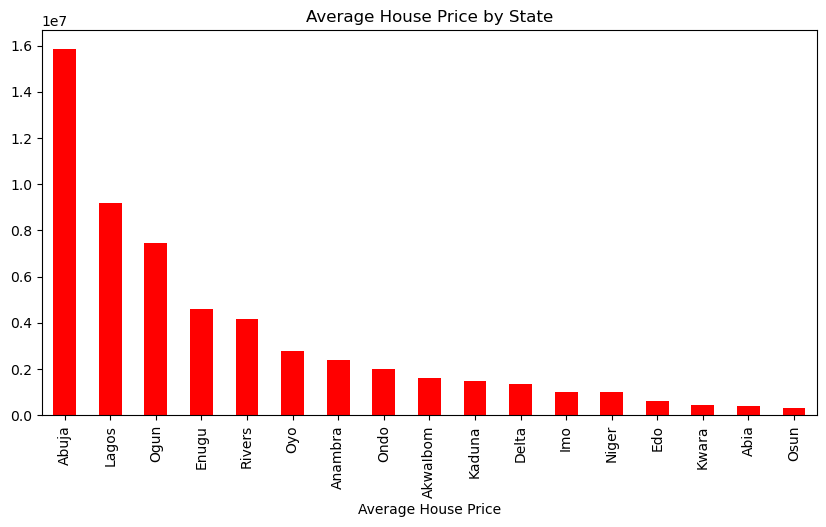

In [25]:
plt.figure(figsize=(10,5))
state.plot(kind='bar', color='red')
plt.xlabel('Average House Price')
plt.title('Average House Price by State')
plt.show()

# State with the Max and Min Average price

In [26]:
#State and city with the Max and Min Average price
MxMn = df.groupby('State').max().sort_values(by='Price', ascending=False)
MxMn

,Description,Price,street
State,,,
Abuja,Warehouse for rent,15000000000,"Zone E, Flomax Plaza"
Lagos,Warehouse for rent,11000000000,"Zone C, Nicon Town"
Ogun,Warehouse for rent,400000000,"Wendy Garuba Estate, Berger"
Rivers,Warehouse for rent,90000000,Woji
Oyo,Warehouse for rent,75000000,"University Of Ibadan, Ajibode"
Enugu,Warehouse for rent,25000000,Thinkers Corner
AkwaIbom,Office space for rent,8000000,Uyeh Estate
Anambra,5 bedroom semi-detached duplex for rent,4000000,"Commissioners Quarters, Awka"
Delta,Office space for rent,3000000,Ulo By Commissioner Street With 33 Line


# For Houses in Lagos

In [27]:
#For Houses in Lagos
state_data = df[df['State'] == 'Lagos']
state_data.head()

,Description,House_type,Price,State,street,city
0,3 bedroom flat / apartment for rent,"3 Bedroom Flat With Additional Big Lounge, Swi...",9500000,Lagos,"Mobolaji Johnson Street, Old Ikoyi",Ikoyi
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,3500000,Lagos,Lekki Conservation,Lekki
2,2 bedroom flat / apartment for rent,Well-spaced And Serviced With 24-hour Power Su...,6500000,Lagos,Oniru,VictoriaIslandVI
3,2 bedroom flat / apartment for rent,Newly Built Luxury 2 Bedroom Apartment With Am...,1500000,Lagos,"Allied Gardens, Newly Built Apartment, Good ...",Ajah
4,Office space for rent,120sqm Open Plan Office Space,40000,Lagos,Allen,Ikeja


In [56]:
# Group by city and calculate average price
grouped = state_data.groupby('city')['Price'].mean().sort_values(ascending=False)
grouped.head()

city
Ojota      1.275000e+08
Apapa      5.150994e+07
Ilupeju    2.742500e+07
Oshodi     2.741958e+07
Ikoyi      2.471860e+07
Name: Price, dtype: float64

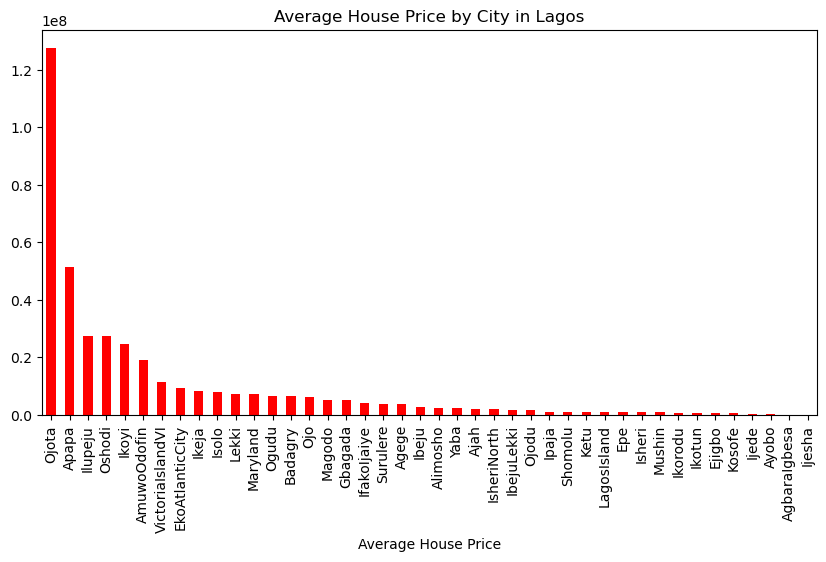

In [57]:
plt.figure(figsize=(10,5))
grouped.plot(kind='bar', color='red')
plt.xlabel('Average House Price')
plt.title('Average House Price by City in Lagos')
plt.show()

In [15]:
#Getting the houses in Lekki
df[df['city']=='Lekki']

,Description,House_type,Price,State,street,city
1,4 bedroom flat / apartment for rent,Luxury 3 Bedroom Apartment & Bq That Comes Wit...,3500000,Lagos,Lekki Conservation,Lekki
9,Office space for rent,4br Duplex With Bq,8000000,Lagos,"Oye Balogun Street, Lekki Phase 1, Lekki Pha...",Lekki
15,2 bedroom flat / apartment for rent,Furnished Two Bedroom Flat With Bq Available,8500000,Lagos,V I,Lekki
16,4 bedroom detached duplex for rent,5 Bedroom Fully Detached Duplex With Bq And Sw...,11000000,Lagos,Osapa London,Lekki
19,Shop for rent,25 Sqm Shop Space,3500000,Lagos,Lekki Phase 1,Lekki
...,...,...,...,...,...,...
20969,2 bedroom flat / apartment for rent,Luxury Brand New 2 Bedroom Apartment,5000000,Lagos,"Admiralty, Lekki Phase 1",Lekki
20972,3 bedroom flat / apartment for rent,Newly Built Fully Serviced 3 Bedroom Apartment...,5000000,Lagos,"Providence, Lekki Phase 1",Lekki
20974,2 bedroom flat / apartment for rent,Fully Furnished 2 Bedroom Apartment,5000000,Lagos,Chevron,Lekki
20975,3 bedroom flat / apartment for rent,Serviced And Spacious 3 Bedroom Apartment,5000000,Lagos,Cromwell Estate Chevron,Lekki


In [53]:
#Getting the price of Houses in Lekki
dfc = df.groupby('city').get_group('Lekki')['Price']
print(dfc)

1         3500000
9         8000000
15        8500000
16       11000000
19        3500000
           ...   
20969     5000000
20972     5000000
20974     5000000
20975     5000000
20976     4500000
Name: Price, Length: 7934, dtype: int64


# Getting price of houses of in porthartcourt

In [41]:
#Getting price of houses of in porthartcourt
Rivers = df[df['State']== 'Rivers']
Rivers

,Description,House_type,Price,State,street,city
8,4 bedroom detached duplex for rent,Elegantly Furnished 4 Bedrooms Duplex With Bq ...,8000000,Rivers,"Golf Estate, Off Peter Odili Road, Trans Amadi",PortHarcourt
13,Office space for rent,Ultra Modern Office Complex On 4 Floors,50000,Rivers,GRA Phase 2,PortHarcourt
223,2 bedroom flat / apartment for rent,Serviced & Fully Furnished 2 Bedroom Flat With...,3500000,Rivers,"Off Abacha Road, GRA Phase 3",PortHarcourt
224,28 bedroom hotel / guest house for rent,Mini Estate,40000000,Rivers,"Off Nzimiro Amadi Flats, Old GRA",PortHarcourt
225,4 bedroom semi-detached duplex for rent,Fully Furnished & Services 4 Bedroom Duplex,7500000,Rivers,Golf Estate Off Peter Odili Road,PortHarcourt
...,...,...,...,...,...,...
20731,2 bedroom flat / apartment for rent,Newly Built Pop Standard 2 Bedroom Flat,1700000,Rivers,Shell Cooperative Estate Off G U Akeh Road E...,PortHarcourt
20732,3 bedroom flat / apartment for rent,Spanish Standard 3 Bedroom Duplex In A Gated E...,2500000,Rivers,Alfredo Avenue Off Parkland Estate Odili Roa...,PortHarcourt
20757,2 bedroom flat / apartment for rent,Standard 2 Bedroom With Steady Light,400000,Rivers,Rumuodara,PortHarcourt
20859,5 bedroom detached duplex for rent,A Five (5) Bedroom Detached House With Service...,10000000,Rivers,Old GRA,PortHarcourt


In [58]:
PH = Rivers.groupby('city')['Price'].mean().sort_values(ascending=False)
PH

city
PortHarcourt    4.162964e+06
Name: Price, dtype: float64

In [18]:
#Getting average price of house in PortHarcourt
df[df['city']== 'PortHarcourt'].mean().astype(np.int64)
#df.groupby('city').get_group('PortHarcourt')['Price'].mean().astype(np.int64)

Price    4162963
dtype: int64